In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
filePath = 'path/kill_match_stats_final_0.csv'
cols = pd.read_csv(filePath, nrows=1)
df = pd.read_csv(filePath, usecols=['map','victim_position_x','victim_position_y'], nrows=20000) # first 20k rows
df = df.loc[(df['map']=='ERANGEL')]

(16588, 2)


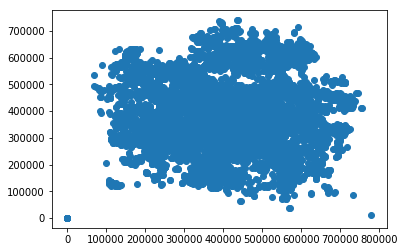

In [7]:
deaths = df[['victim_position_x','victim_position_y']].as_matrix(columns=None)
plt.scatter(deaths[:,0],deaths[:,1])
plt.show()
plt.clf()

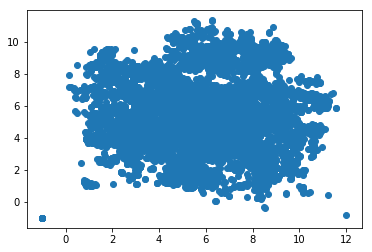

In [8]:
def scale_range (input, min, max):
    input += -(np.min(input))
    input /= np.max(input) / (max - min)
    input += min
    return input

scale_range(deaths, -1, 12)

In [9]:
mu = deaths.mean(axis=0)
sigma = deaths.var(axis=0)
print mu, sigma

[5.71298987 5.35145847] [7.36143001 6.82879176]
-1.0
12.0


In [19]:
from scipy import stats  
dist = stats.norm(mu[0], sigma[0])  
dist.pdf(deaths[:,0])[0:50]  

array([0.05298666, 0.0529756 ])

In [20]:
p = np.zeros((deaths.shape[0], deaths.shape[1]))  
p[:,0] = stats.norm(mu[0], sigma[0]).pdf(deaths[:,0])  
p[:,1] = stats.norm(mu[1], sigma[1]).pdf(deaths[:,1])

pval = np.zeros((Xval.shape[0], Xval.shape[1]))  
pval[:,0] = stats.norm(mu[0], sigma[0]).pdf(Xval[:,0])  
pval[:,1] = stats.norm(mu[1], sigma[1]).pdf(Xval[:,1])  

In [21]:
def select_threshold(pval, yval):  
    best_epsilon = 0
    best_f1 = 0
    f1 = 0

    step = (pval.max() - pval.min()) / 1000

    for epsilon in np.arange(pval.min(), pval.max(), step):
        preds = pval < epsilon

        tp = np.sum(np.logical_and(preds == 1, yval == 1)).astype(float)
        fp = np.sum(np.logical_and(preds == 1, yval == 0)).astype(float)
        fn = np.sum(np.logical_and(preds == 0, yval == 1)).astype(float)

        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        f1 = (2 * precision * recall) / (precision + recall)

        if f1 > best_f1:
            best_f1 = f1
            best_epsilon = epsilon

    return best_epsilon, best_f1

epsilon, f1 = select_threshold(pval, yval)  
epsilon, f1  

/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


(0.04011682170119573, 0.9090909090909091)

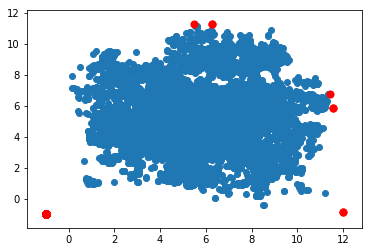

In [22]:
outliers = np.where(p < epsilon)

plt.scatter(deaths[:,0], deaths[:,1])  
plt.scatter(deaths[outliers[0],0], deaths[outliers[0],1], s=50, color='r', marker='o') 
plt.show()
plt.clf()